In [30]:
import numpy as np
from astropy.io import fits
import lime 

In [36]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [37]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file = "../../../reduccion/NGC1313/cal/slit1ok001.fits"

#load the data
wave, flux, hdr = import_1313_fits(fits_file)

In [38]:
# Galaxy redshift and the flux normalization
z_obj = 0.00158
normFlux = 1.000000E15

In [39]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=normFlux)


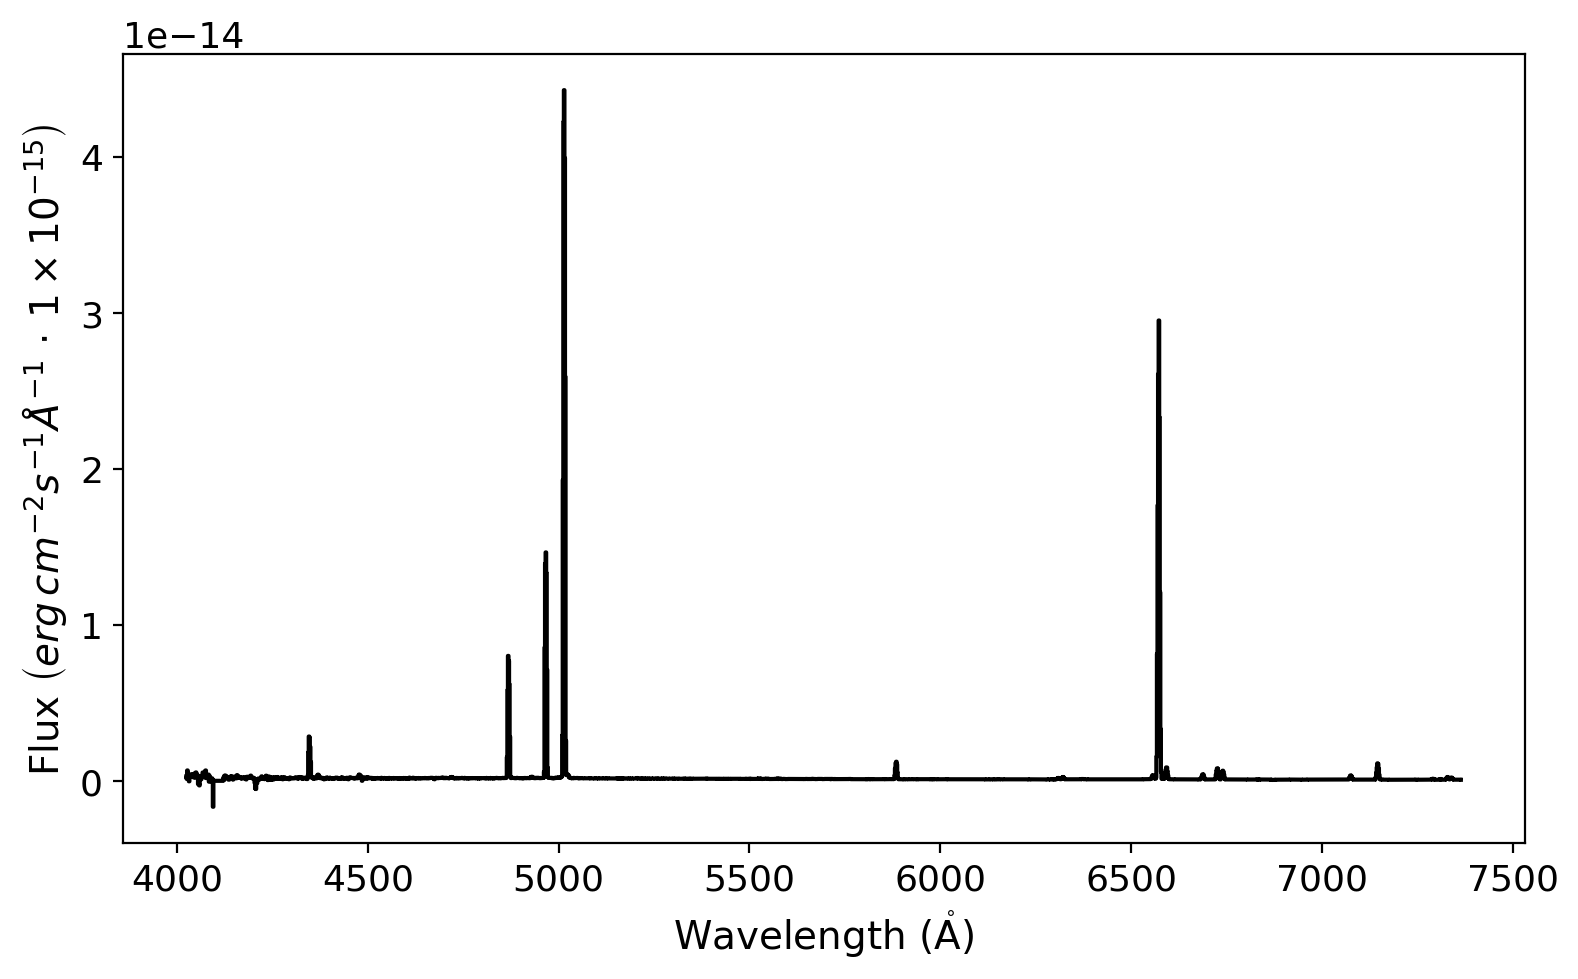

In [40]:
gp_spec.plot.spectrum(label='NGC1313')

In [41]:
# Line name and its location mask in the rest _frame
line = 'H1_6563A'
band_edges = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])

In [42]:
# Run the fitting and plot it
gp_spec.fit.bands(line, band_edges)
gp_spec.plot.bands()

ValueError: Parameter 'line0_amp' has min == max

In [ ]:
ext region y ext glx   

a) corregir x ext nuestra glx asumiendo eb-v (exceso de color)  
b) primero nuestra glx, fitz o card, luego 
ley de extincion 
y posterior mido h alfa y h beta, ratios, calzetti 2000 starburst
obj: tener solo ext de nuestra region !!


al final de todas las correciones por exticioon (galáctica y de la region), mido el flujo de todas las lineas, y la velocidad radial de la región, 

